#Density Based Outlier Detection- Kernel

In [ ]:
from sklearn.datasets import make_blobs
from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# from sklearn.datasets import make_blobs
# from numpy import quantile, random, where
# from sklearn.ensemble import IsolationForest
# import matplotlib.pyplot as plt

In [ ]:
random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))

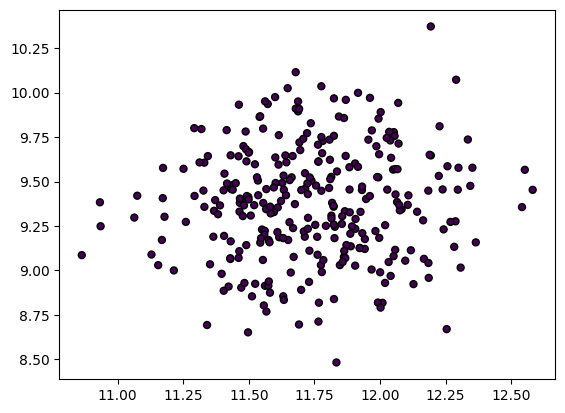

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="k")

In [ ]:
IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X)

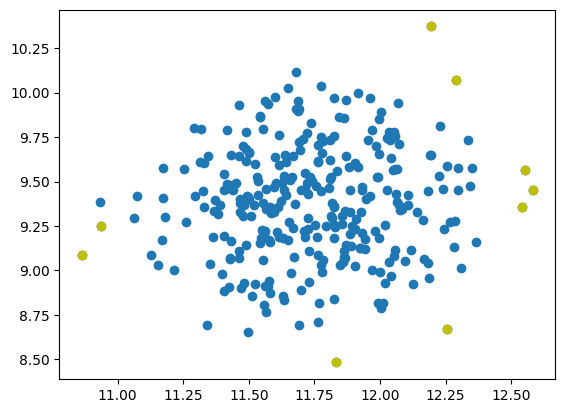

In [ ]:

outlier_index = where(predictions==-1)
values = X[outlier_index]

plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

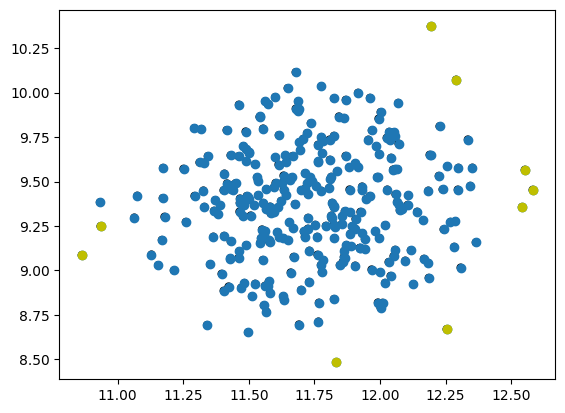

In [ ]:


random.seed(3)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(20, 5))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="k")

IF = IsolationForest(n_estimators=100, contamination=.03)
predictions = IF.fit_predict(X)

outlier_index = where(predictions==-1)
values = X[outlier_index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

#Kernel Density Estimation


In [ ]:
from sklearn.neighbors import KernelDensity
from numpy import where, random, array, quantile
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
random.seed(135)
def prepData(N):
    X = []
    for i in range(n):
        A = i/1000 + random.uniform(-4, 3)
        R = random.uniform(-5, 10)
        if(R >= 8.6):
            R = R + 10
        elif(R < (-4.6)):
            R = R +(-9)
        X.append([A + R])
    return array(X)

n = 500
X = prepData(n)

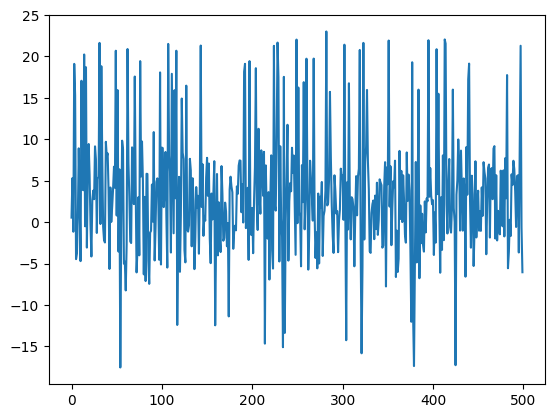

In [ ]:

x_ax = range(n)
plt.plot(x_ax, X)
plt.show()

#Prepare and Fit the Kernel Density Function for Prediction

In [ ]:

kern_dens = KernelDensity()
kern_dens.fit(X)

scores = kern_dens.score_samples(X)
threshold = quantile(scores, .02)
print(threshold)

-5.676136054971186


In [ ]:
-5.676136054971186

-5.676136054971186

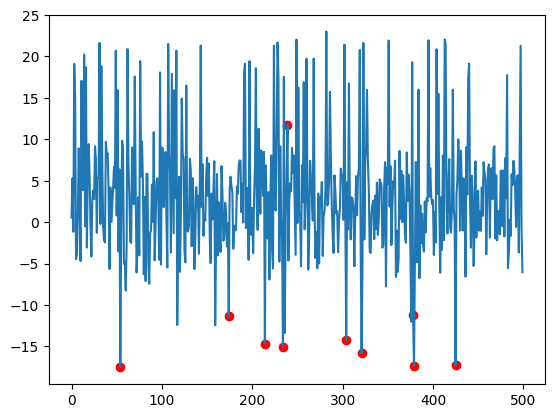

In [ ]:

idx = where(scores <= threshold)
values = X[idx]

plt.plot(x_ax, X)
plt.scatter(idx,values, color='r')
plt.show()

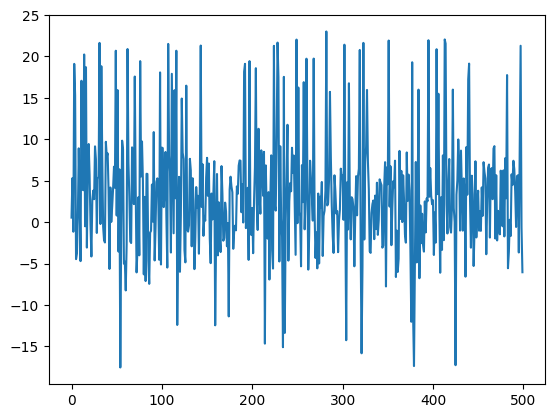

-5.676136054971186


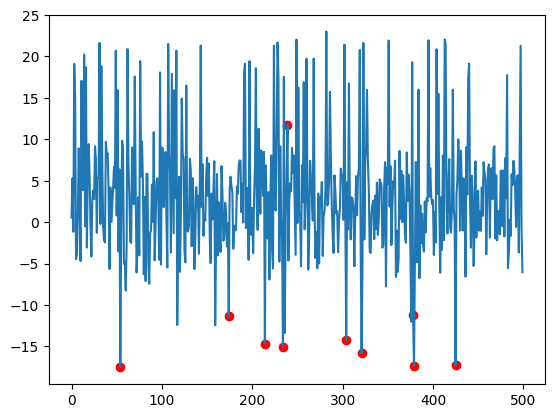

In [ ]:


random.seed(135)
def prepData(N):
    X = []
    for i in range(n):
        A = i/1000 + random.uniform(-4, 3)
        R = random.uniform(-5, 10)
        if(R >= 8.6):
            R = R + 10
        elif(R < (-4.6)):
            R = R +(-9)
        X.append([A + R])
    return array(X)

n = 500
X = prepData(n)

x_ax = range(n)
plt.plot(x_ax, X)
plt.show()

kern_dens = KernelDensity()
kern_dens.fit(X)

scores = kern_dens.score_samples(X)
threshold = quantile(scores, .02)
print(threshold)

idx = where(scores <= threshold)
values = X[idx]
plt.plot(x_ax, X)
plt.scatter(idx,values, color='r')
plt.show()

# Distance Based Outlier Detection - Isolation Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
numerical_cols = ['age', 'bmi', 'children', 'charges']


# Fit Isolation Forest model





In [ ]:

isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(data[numerical_cols])

In [ ]:
outliers = isolation_forest.predict(data[numerical_cols])

# Filter outliers
outliers = data[outliers == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


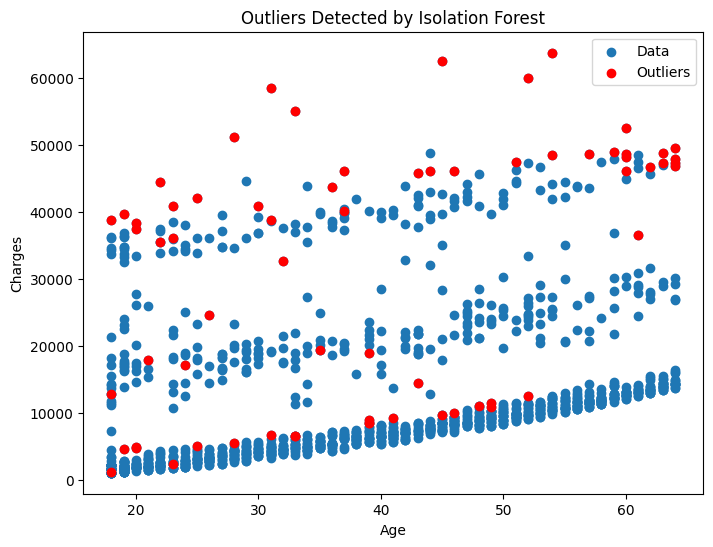

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data['charges'], label='Data')
plt.scatter(outliers['age'], outliers['charges'], color='red', label='Outliers')
plt.title('Outliers Detected by Isolation Forest')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()
